In [23]:
import torch.utils.data as Data
import  torch
import  numpy as np
from torch import nn
import  matplotlib.pyplot  as plt

In [24]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
batch_size = 10
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = torch.mm(features,torch.Tensor(true_w).resize(2,1))+true_b
# labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)
# labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)
data_set = Data.TensorDataset(features,labels)
data_iter = Data.DataLoader(data_set,batch_size,shuffle=True)

# for i,j in data_iter:
#     print(i,j)
#     break

/Users/jck/mambaforge/envs/py39/lib/python3.9/site-packages/torch/_tensor.py:493: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


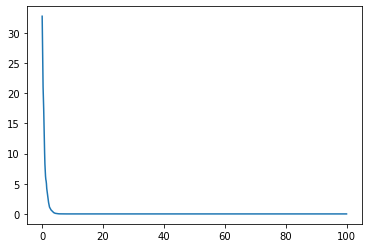

In [31]:
net = nn.Sequential(
    nn.Linear(2,1)
)
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(),0.03)
loss_sum = []
for i in range(10):
    for X,y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
        ls = loss(net(features), labels)
        loss_sum.append(ls.detach().numpy().sum())
        # print(ls.detach().numpy().sum())
        # loss_sum.append(l)
    l = loss(net(features), labels)
    # loss_sum.append(l.sum())
    # loss_sum.append(l.detach().numpy().sum())
    # print(l)

plt.plot(np.arange(0,100,0.1),loss_sum)

torch.Size([2, 125, 5, 5, 5])